In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dat = pd.read_csv("../data/insurance.csv")
dat

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [3]:
dat.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [5]:
dat.describe()

,age,gender,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


## Train set / Test set (6:4 ~ 9:1)

Train set : data that use in making models(during mechine learning) <br>
Test set : extract some data in initial dataset, and then use for testing

In [6]:
X = dat.loc[:, :'smoker']
y = dat['charges'] 

In [7]:
# Random Sampling

In [8]:
# Divide Train Set and Test Set
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=100)
X_train.head(n=3)

,age,gender,bmi,children,smoker
1306,29,0,21.850,0,1
124,47,0,33.915,3,0
588,61,0,35.910,0,0


In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
pred = lr.predict(X_test)

In [14]:
result = pd.DataFrame({'actual': y_test, 'pred' : pred})

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

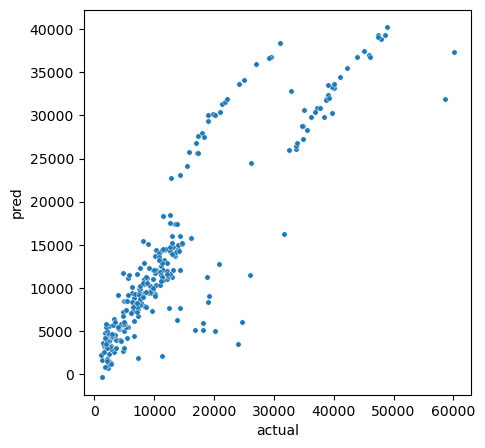

In [16]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=result, x="actual", y="pred", s=15)
plt.show()

## evaluation indicator 

In [17]:
# RMSE (Root-mean-square deviation)
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(y_test, pred, squared=False) # MSE (mean of error square)
# The less the better prediction.


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5684.927776334485

  R-squared
   - $R^2 = 1- \frac{\sum_1^n (y_i - \hat{y_i})^2}{\sum_1^n (y_i - \bar{y})^2} = \frac{\sum_1^n (\hat{y_i} - \bar{y})^2}{\sum_1^n (y_i - \bar{y})^2}$ <br>
  - $0 \leq R^2 \leq 1$ : the more R-squared value is big, the better explainable

In [19]:
# R-squared(how much explain the dispersion of data)
lr.score(X_train, y_train) # 73% explaination

0.7368220127747351

# Principle of Linear Regression

- simple and easy to predict
- predict relation of independence variable and dependence variable, assume the relationship to linear relation.
- sequence value

# Estimation Methods in Linear Regression

In linear regression, several metrics are used to evaluate the performance of a model. Here are some of the most common estimation methods:

## 1. Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) measures the average magnitude of the errors in a set of predictions, **without considering their direction**. <br> Average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

- But it have problems because it's ignore the sign of value

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

$y_i$ : Actual values <br>
$\hat{y}_i $: Predicted values <br>
$n$: Number of observations


## 2. Mean Squared Error (MSE)

The Mean Squared Error (MSE) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- But it have problems because it can be really big.

## 3. Root Mean Squared Error (RMSE)

The Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors. It gives an idea of how much error is in the predictions and is in the same units as the response variable.

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

## 4. R-Squared ($R^2$)

R-Squared (\(R^2\)) is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

$\bar{y}$ : mean of actual value


**Interpretation:**
- $R^2$ = 1 indicates that the regression predictions perfectly fit the data.
- $R^2$ = 0 indicates that the regression predictions do not explain the variability of the response data around its mean.

$R^2$ is closer to 1, it means more **explainable** !

In [20]:
X_train.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker'], dtype='object')

In [21]:
lr.coef_ # coefficient (a of (ax + b))

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [22]:
pd.Series(lr.coef_, index=X_train.columns)

age           264.799803
gender         17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [23]:
lr.intercept_

-11576.999976112353

in our model <br>
predicted_charges = 264.799803 * $age$ +  17.344661 * $gender$ + 297.514806 * $bmi$ + 469.339602 * $children$, 23469.280173 * $smoker$ -11576.999976112353